In [90]:
import csv

import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [91]:
def plotting(input_files, labels, output_files,
             left_axis, right_axis, top_axis, bottom_axis,
             x_axis, y_axis, x_label, y_label, title):
    fig, ax = plt.subplots()

    for filename, label in zip(input_files, labels):
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            x = []
            y = []
            current_min_y = float('inf')  # Start with infinity to find the minimum
            last_x_block = -1

            # Read data and find the minimum y for each block of 1000 x-values
            for row in reader:
                x_value = int(row[x_axis])
                y_value = float(row[y_axis])

                x_block = x_value // 1000  # Determine the block number for the current x

                if x_block != last_x_block:  # Check if we moved to a new block
                    if last_x_block != -1:  # Avoid appending during the first block initialization
                        x.append(last_x_block * 1000)
                        y.append(current_min_y)
                    current_min_y = y_value  # Reset minimum y for the new block
                    last_x_block = x_block
                else:
                    current_min_y = min(current_min_y, y_value)  # Update the minimum y if current y is lower

            # Append the last block's data
            if last_x_block != -1:
                x.append(last_x_block * 1000)
                y.append(current_min_y)

        # Plot the data for this file
        ax.plot(x, y, label=label, linewidth=0.8)

    ax.set_xscale('linear')
    ax.set_xlim(left=left_axis, right=right_axis)
    ax.set_yscale('log')
    ax.set_ylim(bottom=bottom_axis, top=top_axis)
    # ax.set_xlabel(x_label)
    # ax.set_ylabel(y_label)
    # ax.set_title(title)
    ax.legend()
    plt.savefig(output_files, dpi=600)
    plt.show()


In [92]:
def plotting_smooth(input_files, labels, output_files,
             left_axis, right_axis, top_axis, bottom_axis,
             x_axis, y_axis, x_label, y_label, title, frac=0.2):
    fig, ax = plt.subplots()

    for filename, label in zip(input_files, labels):
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            x = []
            y = []
            current_min_y = float('inf')  # Start with infinity to find the minimum
            last_x_block = -1
            min_y_cache = {}  # Cache for minimum y values of each block

            # Read data and find the minimum y for each block of 1000 x-values
            for row in reader:
                x_value = int(row[x_axis])
                y_value = float(row[y_axis])
                
                x_block = x_value // 1000  # Determine the block number for the current x
                
                if x_block != last_x_block:  # Check if we moved to a new block
                    if last_x_block != -1:  # Avoid appending during the first block initialization
                        x.append(last_x_block * 1000)
                        y.append(min_y_cache[last_x_block])
                    current_min_y = y_value  # Reset minimum y for the new block
                    last_x_block = x_block
                else:
                    current_min_y = min(current_min_y, y_value)  # Update the minimum y if current y is lower
                
                # Update the minimum y for the current block
                min_y_cache[x_block] = current_min_y

            # Append the last block's data
            if last_x_block != -1:
                x.append(last_x_block * 1000)
                y.append(min_y_cache[last_x_block])

        # Perform LOWESS smoothing
        y_smooth = lowess(y, x, frac=frac)[:, 1]

        # Plot the smoothed data for this file
        ax.plot(x, y_smooth, label=label, linewidth=0.8)

    ax.set_xscale('linear')
    ax.set_xlim(left=left_axis, right=right_axis)
    ax.set_yscale('log')
    ax.set_ylim(bottom=bottom_axis, top=top_axis)
    # ax.set_xlabel(x_label)
    # ax.set_ylabel(y_label)
    # ax.set_title(title)
    ax.legend()
    plt.savefig(output_files, dpi=600)
    plt.show()


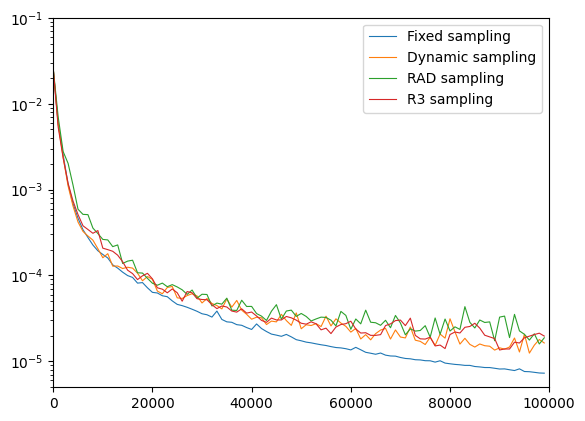

In [93]:
# sampler_loss
left_axis = 0
right_axis = 100000
bottom_axis = 5.0e-6
top_axis = 1.0e-1
x_label = 'Iteration'
y_label = 'Loss Value'
x_axis = 0
y_axis = 1

input_files = [
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-fixed_20240418_181831.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-dynamic_20240418_181703.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-RAD_20240418_203401.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-R3_20240418_181900.txt'
]

labels = [
    'Fixed sampling',
    'Dynamic sampling',
    'RAD sampling',
    'R3 sampling'
]

output_files = './sampler_loss'
title = 'sampler_loss'
plotting(input_files, labels, output_files,
         left_axis, right_axis, top_axis, bottom_axis,
         x_axis, y_axis, x_label,
         y_label, title)

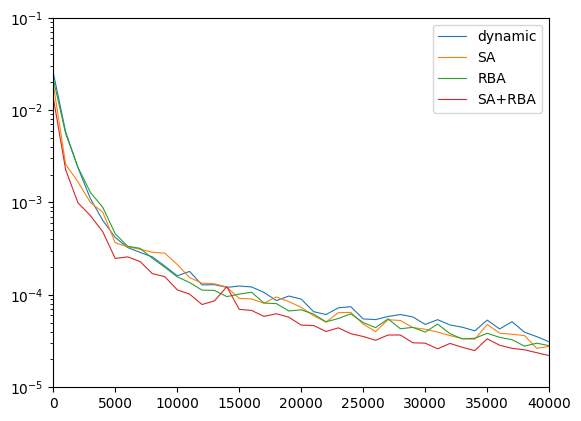

In [97]:
# ablation_loss
left_axis = 0
right_axis = 40000
bottom_axis = 1.0e-5
top_axis = 1.0e-1
x_label = 'Iteration'
y_label = 'Loss Value'
x_axis = 0
y_axis = 1

input_files = [
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-dynamic_20240418_181703.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-SA_20240418_190753.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-RBA_20240418_190747.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/1000/NS-SA+RBA_20240418_190802.txt'
]

labels = [
    'dynamic',
    'SA',
    'RBA',
    'SA+RBA'
]

output_files = './loss-function_loss'
title = 'loss-function_loss'
plotting(input_files, labels, output_files,
         left_axis, right_axis, top_axis, bottom_axis,
         x_axis, y_axis, x_label,
         y_label, title)

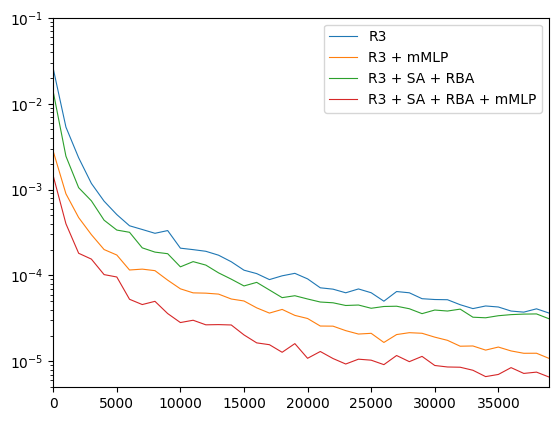

In [98]:
# ablation_loss
left_axis = 0
right_axis = 39000
bottom_axis = 5.0e-6
top_axis = 1.0e-1
x_label = 'Iteration'
y_label = 'Loss Value'
x_axis = 0
y_axis = 1

input_files = [
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/6_R3_20240513_191910_l2.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/9_mMLP_20240513_200704_l2.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/10_SA+RBA_20240513_203821_l2.txt',
    '/home/yuxin/_ws_/PINN/PINN_Acc/logs/11_SA+RBA+mMLP_20240513_203826_l2.txt'
]

labels = [
    'R3',
    'R3 + mMLP',
    'R3 + SA + RBA',
    'R3 + SA + RBA + mMLP'
]

output_files = './ablation_loss'
title = 'ablation_loss'
plotting(input_files, labels, output_files,
         left_axis, right_axis, top_axis, bottom_axis,
         x_axis, y_axis, x_label,
         y_label, title)